# Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'D:\CF NHL Project\2 Data'

In [3]:
game_player_stats = pd.read_csv(os.path.join(path, 'Prepared Data', 'game_team_stats_updated.csv'), index_col = False)

In [6]:
game_player_stats.head()

,game_id,season,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,venue_time_zone_id,...,team_goals,team_shots,team_hits,team_pim,powerPlayOpportunities,team_powerPlayGoals,faceOffWinPercentage,team_giveaways,team_takeaways,team_blocked
0,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
1,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
2,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
3,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
4,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0


In [5]:
# Removing rink side data
game_player_stats = game_player_stats.drop(columns = ['Unnamed: 0'])

In [7]:
#Enable visuals
%matplotlib inline

In [8]:
game_player_stats.columns

Index(['game_id', 'season', 'date_time_GMT', 'away_team_id', 'home_team_id',
       'away_goals', 'home_goals', 'outcome', 'venue', 'venue_time_zone_id',
       'venue_time_zone_tz', 'player_id', 'firstName', 'lastName',
       'nationality', 'birthCity', 'primaryPosition', 'birthDate', 'height',
       'height_cm', 'weight', 'side_shot_from', 'team_id', 'timeOnIce',
       'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'franchiseId', 'team_location', 'teamName',
       'state_province', 'abbreviation', 'home_or_away', 'won', 'settled_in',
       'head_coach', 'team_goals', 'team_shots', 'team_hits', 'team_pim',
       'powerPlayOpportunities', 'team_powerPlayGoals', 'faceOffWinPercentage',
       'team_giveaways', 'team_takeaways

In [9]:
#making variable subset
game_player_sub = game_player_stats[['team_location', 'teamName', 'state_province', 'won', 'team_goals', 'team_shots', 'team_hits', 'team_pim', 'team_giveaways', 'team_takeaways', 'team_blocked']]

In [10]:
game_player_sub.head()

,team_location,teamName,state_province,won,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0
1,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0
2,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0
3,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0
4,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0


In [11]:
game_player_sub.shape

(853314, 11)

### Data cleaning

In [12]:
game_player_sub_nodup = game_player_sub.drop_duplicates()

In [13]:
game_player_sub_nodup.shape

(47319, 11)

In [14]:
game_player_sub_nodup.isnull().sum()

team_location     0
teamName          0
state_province    0
won               0
team_goals        0
team_shots        0
team_hits         0
team_pim          0
team_giveaways    0
team_takeaways    0
team_blocked      0
dtype: int64

In [15]:
game_player_sub_nodup.head()

,team_location,teamName,state_province,won,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,Chicago,Blackhawks,Illinois,True,7,28,20.0,8,16.0,8.0,9.0
18,Philadelphia,Flyers,Pennsylvania,False,4,27,30.0,6,12.0,9.0,11.0
36,Buffalo,Sabres,New York,False,3,33,17.0,8,5.0,6.0,14.0
54,Anaheim,Ducks,California,True,4,34,16.0,6,7.0,4.0,14.0
72,Colorado,Avalanche,Colorado,True,4,29,17.0,9,13.0,5.0,20.0


## Checking extremes

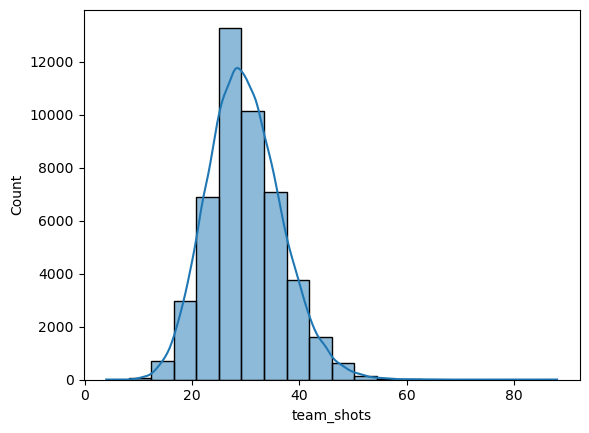

In [21]:
#Created a histogram for extreme values for team_shots
hist_price = sns.histplot(game_player_sub_nodup['team_shots'], bins = 20, kde = True)

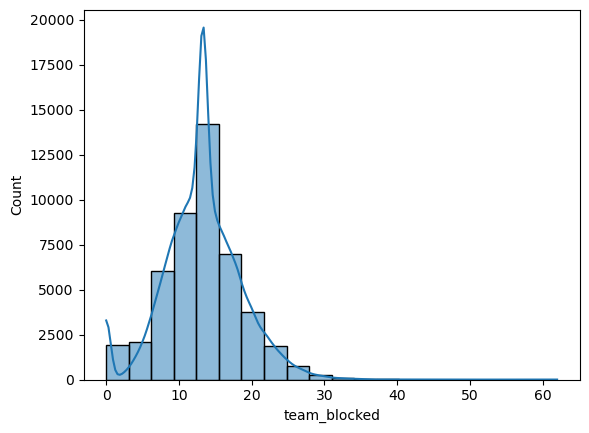

In [26]:
#Created a histogram for extreme values for blocked shots
hist_price = sns.histplot(game_player_sub_nodup['team_blocked'], bins = 20, kde = True)

## Regression prep

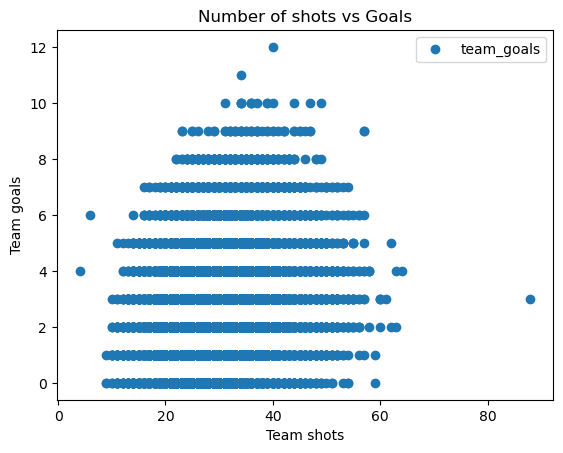

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

game_player_sub_nodup.plot(x = 'team_shots', y='team_goals',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of shots vs Goals')  
plt.xlabel('Team shots')  
plt.ylabel('Team goals')  
plt.show()

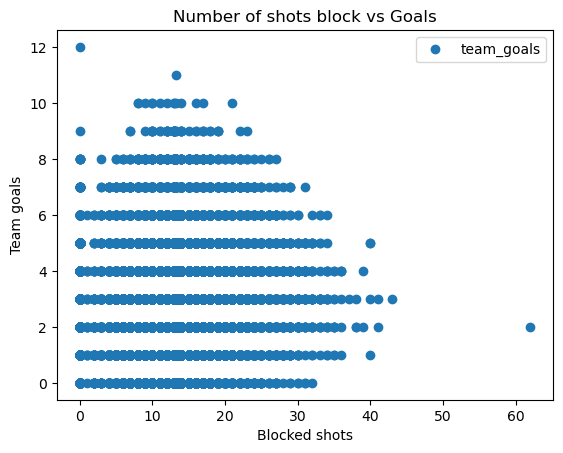

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

game_player_sub_nodup.plot(x = 'team_blocked', y='team_goals',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of shots block vs Goals')  
plt.xlabel('Blocked shots')  
plt.ylabel('Team goals')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = game_player_sub_nodup['team_shots'].values.reshape(-1,1)
y = game_player_sub_nodup['team_goals'].values.reshape(-1,1)

In [30]:
X

array([[28],
       [27],
       [33],
       ...,
       [32],
       [20],
       [33]], dtype=int64)

In [36]:
y

array([[7],
       [4],
       [3],
       ...,
       [5],
       [4],
       [1]], dtype=int64)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [38]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

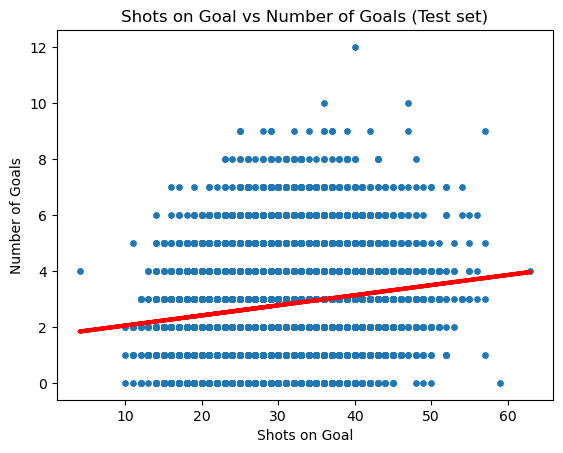

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Shots on Goal vs Number of Goals (Test set)')
plot_test.xlabel('Shots on Goal')
plot_test.ylabel('Number of Goals')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [43]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03606849]]
Mean squared error:  2.5974839834936936
R2 score:  0.02310533811041804


In [44]:
# Created a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,2.736660
1,5,2.520250
2,3,2.917003
3,2,3.169482
4,5,3.061277
5,2,2.700592
6,3,2.844866
7,3,2.700592
8,3,3.025208
9,2,2.664523


In [45]:
# Predicted

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03606849]]
Mean squared error:  2.6828851109857728
R2 score:  0.02225423177635444


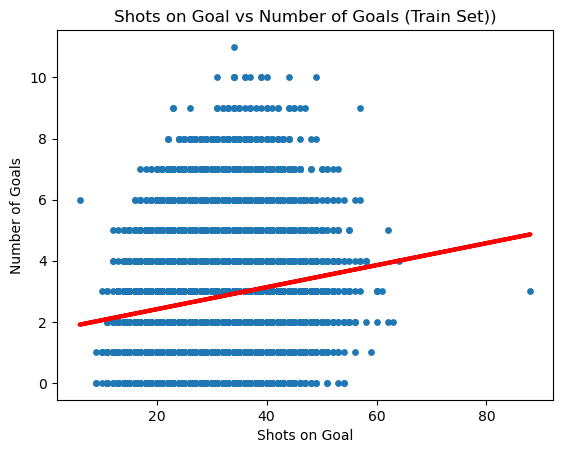

In [48]:
# Visualized the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Shots on Goal vs Number of Goals (Train Set))')
plot_test.xlabel('Shots on Goal')
plot_test.ylabel('Number of Goals')
plot_test.show()

## Conclusion

Based on the slope, there is a positive relationship with shots and goals. That is about the only good part for this. While the MSE is only 2.59 in the test and 2.68 in the train because it's dealing with smaller numbers with the goals, it's actually a large number given how small goals are so I would say that it's telling me regression might not be the best fit. This is further shown with the r-squared value being at 2% in most the models. Overall regression for these stats is not a good fit. 